In [1]:
#importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import the dataset

insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head(25000)

,age,sex,bmi,smoker,alcohol_consumer,disease,charges
0,51,female,34.10,no,yes,Mental and behavioral disorders,0.0
1,19,female,40.50,no,yes,Mental and behavioral disorders,0.0
2,18,female,39.16,no,yes,Advanced-stage cancer,0.0
3,54,female,31.90,no,yes,Coma,0.0
4,26,female,34.20,no,yes,Mental and behavioral disorders,0.0
...,...,...,...,...,...,...,...
20651,29,female,29.59,no,no,Mental and behavioral disorders,0.0
20652,62,female,36.86,no,no,Liver disease,0.0
20653,30,male,24.40,yes,yes,AIDS,0.0
20654,55,female,23.12,no,yes,no,15253.0


In [4]:
# Describe the datas of numarical columns

insurance_data.describe()

,age,bmi,charges
count,20656.000000,20656.000000,20656.000000
mean,39.993658,29.603821,4972.568940
std,14.012824,6.128924,9339.985538
min,18.000000,15.960000,0.000000
25%,28.000000,25.175000,0.000000
50%,40.000000,29.455000,0.000000
75%,52.000000,33.600000,5758.142500
max,65.000000,53.130000,36015.080000


In [5]:
# Check is there any null values or not

insurance_data.isnull().sum()

age                 0
sex                 0
bmi                 0
smoker              0
alcohol_consumer    0
disease             0
charges             0
dtype: int64

<Figure size 600x600 with 0 Axes>

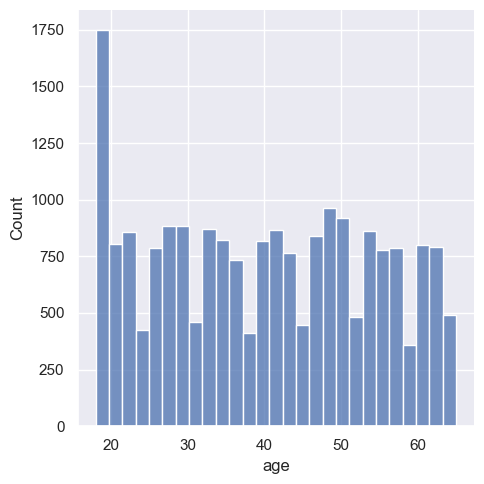

In [6]:
#Data Distribution for Numerical Column - Age

sns.set()
                    # lenght and width
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.show()

# In this the age 20 gap is more persons

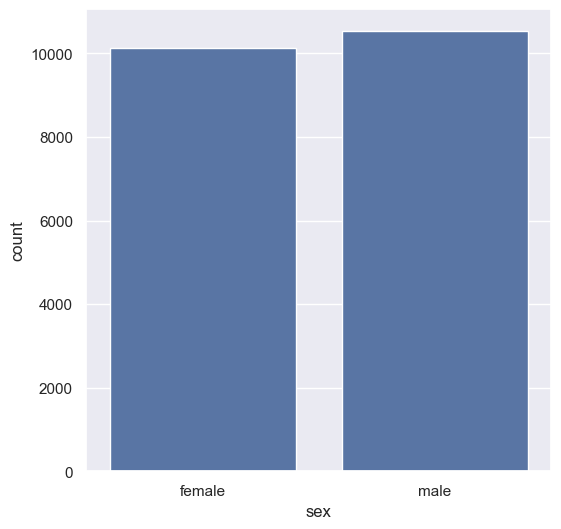

In [7]:
#Column charts for Categorical Column - Sex

sns.set()
plt.figure(figsize=(6,6))
    # Instead displot here we use countplot
sns.countplot(x= insurance_data['sex'], data = insurance_data)
plt.show()

<Figure size 600x600 with 0 Axes>

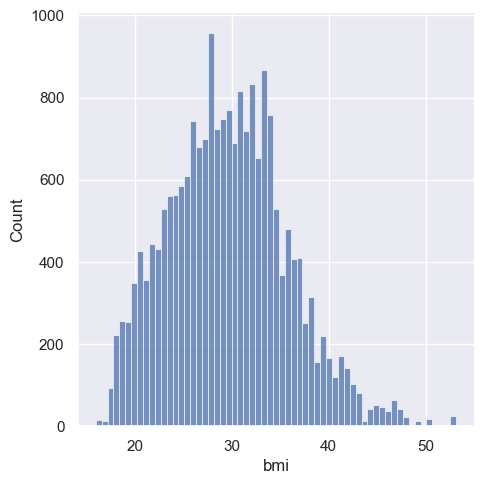

In [8]:
#Data Distribution for Numerical Column - BMI

sns.set()
                    # lenght and width
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.show()

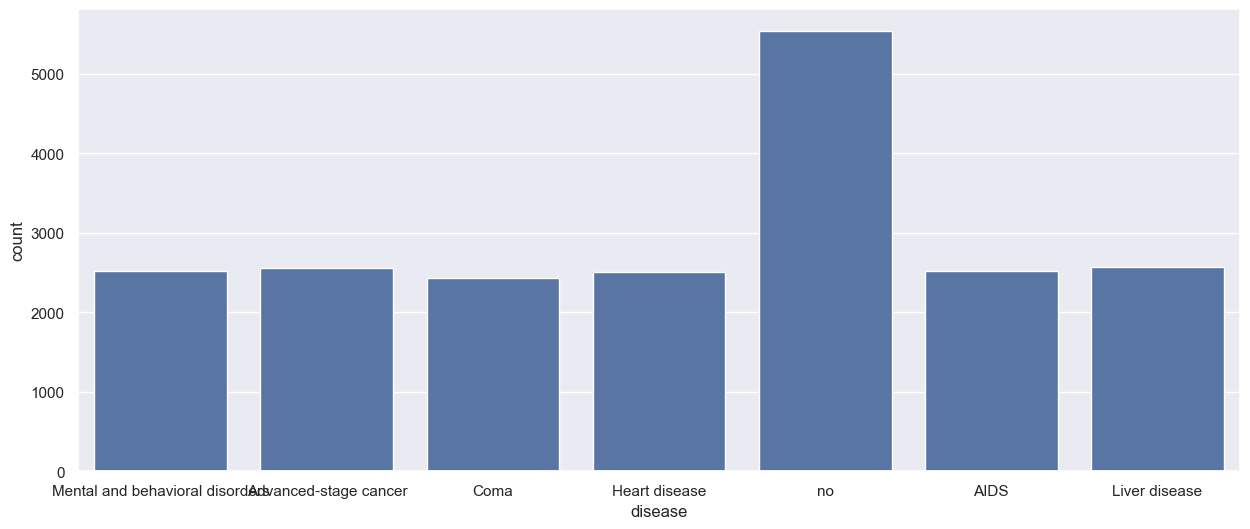

In [9]:
#Column charts for Categorical Column - disease
sns.set()
plt.figure(figsize=(15,6))
sns.countplot(x= insurance_data['disease'], data = insurance_data)
plt.show()

In [10]:
# Check unique values of the disease

insurance_data['disease'].value_counts()

disease
no                                 5538
Liver disease                      2576
Advanced-stage cancer              2562
Mental and behavioral disorders    2520
AIDS                               2519
Heart disease                      2508
Coma                               2433
Name: count, dtype: int64

In [11]:
#Converting Categorical Columns into Numerical Columns

# Here added (future.no_silent_downcasting) because if not add that, it shows an error and that error has mentioned to add this. How ever it convert

# Explicitly opting in to future behavior
pd.set_option('future.no_silent_downcasting', True)

insurance_data.replace({'sex':{'female':0, 'male':1}}, inplace=True)

insurance_data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

insurance_data.replace({'alcohol_consumer':{'no':0, 'yes':1}}, inplace=True)

insurance_data.replace({'disease':{'no':0, 'Heart disease':1, 'Advanced-stage cancer':2, 'Mental and behavioral disorders':3,
                                  'Liver disease':4, 'AIDS':5, 'Coma':6}}, inplace=True)

# Resetting the behavior to avoid affecting other scripts
pd.set_option('future.no_silent_downcasting', False)

In [12]:
# Split the dataset into input and output dataset
# Input data - age, sex, bmi, children, smoker, region
# Output data - charges

input_data = insurance_data.drop(columns='charges')
output_data = insurance_data['charges']

In [13]:
input_data

,age,sex,bmi,smoker,alcohol_consumer,disease
0,51,0,34.10,0,1,3
1,19,0,40.50,0,1,3
2,18,0,39.16,0,1,2
3,54,0,31.90,0,1,6
4,26,0,34.20,0,1,3
...,...,...,...,...,...,...
20651,29,0,29.59,0,0,3
20652,62,0,36.86,0,0,4
20653,30,1,24.40,1,1,5
20654,55,0,23.12,0,1,0


In [14]:
output_data

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
20651        0.0
20652        0.0
20653        0.0
20654    15253.0
20655        0.0
Name: charges, Length: 20656, dtype: float64

In [15]:
# Split the dataset into 2 parts (Training dataset - 80% and Testing dataset - 20%)
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)

In [16]:
# print the input shape
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(20656, 6) (16524, 6) (4132, 6)


In [17]:
# print the output shape
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(20656,) (16524,) (4132,)


In [18]:
# Create the Model (sklearn) - RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [19]:
#Training the Model

model.fit(input_train_data, output_train_data)

,n_estimators,100
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
#predicting values with Test Dataset

test_data_predictions = model.predict(input_test_data) 

In [21]:
# input test datas are here
test_data_predictions

array([   0.        ,    0.        ,    0.        , ...,    0.        ,
          0.        , 7930.62549691])

In [22]:
#Evaluating Model - r2_score is one of the metrics going ot evaluate our model score

from sklearn.metrics import r2_score

In [23]:

r2_score(test_data_predictions,output_test_data)

0.9956978193994994

In [24]:
# Check model feature names
feature_names = model.feature_names_in_
print("Expected Features:", feature_names)

input_data = (48, 0, 31.62, 0, 0, 0)

# Convert above data into numpy array
input_data_array = np.asarray(input_data)

# Now convert the input data array into a shape (reshape we have to do it)
input_data_array = input_data_array.reshape(1,-1)

# Wrap the reshaped NumPy array in a DataFrame, ensuring the column names match the feature names.
feature_names = model.feature_names_in_
input_data_df = pd.DataFrame(input_data_array, columns=feature_names)

insurance_premium = model.predict(input_data_df)

Expected Features: ['age' 'sex' 'bmi' 'smoker' 'alcohol_consumer' 'disease']


In [25]:
print(f"Price is: {insurance_premium[0]}")

Price is: 8323.812557676029


In [26]:
# Save the model
import pickle as pkl

In [27]:
pkl.dump(model, open('insurance.pkl','wb'))